### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
# I use these three lines of code on top of my each Notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [2]:
# Downloading all necessary Libraries and Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import zipfile
import tensorflow as tf

from google.colab import files
from shutil import  copyfile
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Getting the Data**
* I am using Google Colab for this Project, so the act of reading the Data might be different from different platforms. I have used the link below to download the full data of [Dog vs. Cat](https://www.kaggle.com/c/dogs-vs-cats/overview) from [Kaggle](https://www.kaggle.com/). You can manually download the Data from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) as well.

In [3]:
# Loading the Data or Downloading the Data.
# Using Google Colab for reading or loading the Data.
# Uncomment the line below
#!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"


--2020-08-12 06:40:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 2.19.105.18, 2a02:26f0:6b:5a5::e59, 2a02:26f0:6b:5b3::e59
Connecting to download.microsoft.com (download.microsoft.com)|2.19.105.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   125MB/s    in 6.8s    

2020-08-12 06:40:30 (115 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



**Processing the Data**
* The following Python code will use OS library to access the file system and zip file library, allowing you to unzip the file.

In [4]:
# Processing the zip file of the Data
local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

* Now, Let's find the total number of Cats and Dogs Images in the Data directories.

In [5]:
# Finding the total number of Cats and Dogs images in the directory.
# Total number of Cats.
print(f"Total number of Cats is {len(os.listdir('/tmp/PetImages/Cat/'))}")
# Total number of Dogs.
print(f"Total number of Dogs is {len(os.listdir('/tmp/PetImages/Dog/'))}")

Total number of Cats is 12501
Total number of Dogs is 12501


**Creating new Directories**
* Creating a new directory for cats-vs-dogs and subdirectories for training and validation. These subdirectories will need more subdirectories for cats and dogs.

In [6]:
# Using os.mkdir to create new directories
# Creating new directories for training and validation
try:
  os.mkdir("/tmp/cats-vs-dogs")
  os.mkdir("/tmp/cats-vs-dogs/training")
  os.mkdir("/tmp/cats-vs-dogs/validation")
  os.mkdir("/tmp/cats-vs-dogs/training/Cats")
  os.mkdir("/tmp/cats-vs-dogs/training/Dogs")
  os.mkdir("/tmp/cats-vs-dogs/validation/Cats")
  os.mkdir("/tmp/cats-vs-dogs/validation/Dogs")
except OSError:
  pass

**Splitting the Data into Training and Validation**
* I will write a function which will takes a SOURCE directory containing the files, a TRAINING directory that a portion of files will be copied to, a VALIDATION directory that a portion of files will be copied to, and SPLIT_SIZE to determine the portion. 90% of the Images will be copied into TRAINING directory and remaining 10% of the Images will be copied into VALIDATION directory. Every Images will be checked, if any of the Images has zero file length then they won't be copied over.

In [8]:
# Writing the function which splits the data into Training and Validation or Testing.
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "is zero length, so ignoring!")
  
  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CAT_DIR = "/tmp/cats-vs-dogs/training/Cats/"
VALIDATION_CAT_DIR = "/tmp/cats-vs-dogs/validation/Cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOG_DIR = "/tmp/cats-vs-dogs/training/Dogs/"
VALIDATION_DOG_DIR = "/tmp/cats-vs-dogs/validation/Dogs/"

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, SPLIT_SIZE)

666.jpg is zero length, so ignoring!
11702.jpg is zero length, so ignoring!


* Finding the total number of Images in Training and Validation Dataset. The Training Dataset has 90% of the total Images present in the directory and Validation Dataset has 10% of the total Images present in the directory.

In [9]:
# Total number of images in Training
print(f"Total number of training Cats is {len(os.listdir('/tmp/cats-vs-dogs/training/Cats/'))}")
print(f"Total number of training Dogs is {len(os.listdir('/tmp/cats-vs-dogs/training/Dogs/'))}")

# Total number of images in Validation
print(f"Total number of validation Cats is {len(os.listdir('/tmp/cats-vs-dogs/validation/Cats/'))}")
print(f"Total number of validation Dogs is {len(os.listdir('/tmp/cats-vs-dogs/validation/Dogs/'))}")

Total number of training Cats is 11250
Total number of training Dogs is 11250
Total number of validation Cats is 1250
Total number of validation Dogs is 1250


* Let's define each of these directories as follows:

In [10]:
# Directory with training cats images
train_cats_dir = os.path.join("/tmp/cats-vs-dogs/training/Cats")

# Directory with training dogs images.
train_dogs_dir = os.path.join("/tmp/cats-vs-dogs/training/Dogs")

# Directory with validation cats images
validation_cats_dir = os.path.join("/tmp/cats-vs-dogs/validation/Cats")

# Directory with validation dogs images
validation_dogs_dir = os.path.join("/tmp/cats-vs-dogs/validation/Dogs")

* Now, Let's look at the filenames in cats and dogs training and validation directories.

In [11]:
# Training Cat directory
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

# Training Dog directory
train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

# Validation Cat directory
validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

# Validation Dog directory
validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])

['11265.jpg', '4257.jpg', '4394.jpg', '11603.jpg', '12040.jpg', '4910.jpg', '5850.jpg', '9057.jpg', '12033.jpg', '1768.jpg']
['11265.jpg', '4257.jpg', '4394.jpg', '6885.jpg', '11603.jpg', '12040.jpg', '10397.jpg', '4910.jpg', '9525.jpg', '5850.jpg']
['1768.jpg', '9288.jpg', '5725.jpg', '11763.jpg', '3411.jpg', '8011.jpg', '12092.jpg', '333.jpg', '4072.jpg', '3236.jpg']
['11265.jpg', '12407.jpg', '2683.jpg', '2492.jpg', '1214.jpg', '4072.jpg', '2264.jpg', '12398.jpg', '2587.jpg', '4657.jpg']


**Data Visualization**
* Now, Let's look at the few pictures of the Images to get the sense of how does the Data actually looks like.

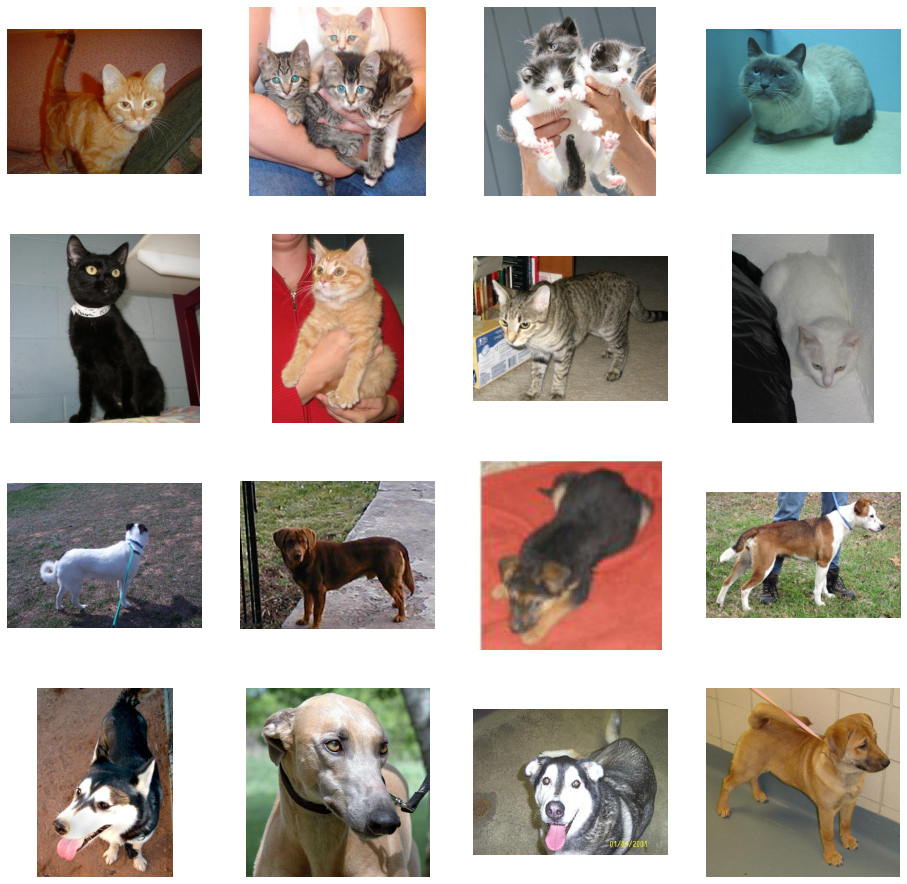

In [12]:
# Parameters for our graph 
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_px = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_px = [os.path.join(train_dogs_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_px + next_dog_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Convolutional Neural Network**
* Building Convolutional Neural Network from scratch using Tensorflow and Keras API.
* Since it is a two class Classification problem i.e a Binary Classfication problem, I will use sigmoid activation so that the output of my network will be a single scalar between 0 and 1, encodig the probability of the images.

In [13]:
# Building Convolutional Neural Network from scratch
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    # Input image has 3 bytes color
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The sixth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed in Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

* Let's look at the summary of the Neural Network.

In [14]:
# Summary of Neural Network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

* Next, I will configure the specifications for model training. I will train the model with binary_crossentropy loss, because it is a binary classification problem and the activation is sigmoid.
* Here, I will be using RMSprop which is preferable for Stochastic Gradient Descent because RMSprop automates learning rate tuning for us.

In [15]:
# Compile the Model
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

**Data Processing**
* I will process our images by normalizing pixel values in range of [0, 1] which is originally in range of [0, 255]

In [19]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/tmp/cats-vs-dogs/training",
    target_size=(300, 300),
    batch_size=64,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/cats-vs-dogs/validation",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### **Training the Model**
* I will train the Model for 100 epochs and 8 epoch per steps.
* The Loss and Accuracy are the great indication of the progress of training. It's making a guess to the classification of the training data and then measuring it against the known label calculating the result. Accuracy is the portion of the correct guesses.

In [20]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/50
8/8 [==============================] - 12s 1s/step - loss: 0.5561 - accuracy: 0.7285 - val_loss: 0.6035 - val_accuracy: 0.6992
Epoch 2/50
8/8 [==============================] - 13s 2s/step - loss: 0.5313 - accuracy: 0.7637 - val_loss: 0.5639 - val_accuracy: 0.7227
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 0.5401 - accuracy: 0.7305 - val_loss: 0.4395 - val_accuracy: 0.7969
Epoch 4/50
8/8 [==============================] - 13s 2s/step - loss: 0.5522 - accuracy: 0.7148 - val_loss: 0.5300 - val_accuracy: 0.7344
Epoch 5/50
8/8 [==============================] - 13s 2s/step - loss: 0.5470 - accuracy: 0.7363 - val_loss: 0.4585 - val_accuracy: 0.7852
Epoch 6/50
8/8 [==============================] - 13s 2s/step - loss: 0.5655 - accuracy: 0.7148 - val_loss: 0.5000 - val_accuracy: 0.7656
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 0.5204 - accuracy: 0.7344 - val_loss: 0.4915 - val_accuracy: 0.7617
Epoch 8/50
7/8 [==================

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

8/8 [==============================] - 13s 2s/step - loss: 0.5237 - accuracy: 0.7520 - val_loss: 0.5671 - val_accuracy: 0.7422
Epoch 9/50
8/8 [==============================] - 13s 2s/step - loss: 0.5919 - accuracy: 0.7031 - val_loss: 0.4921 - val_accuracy: 0.7812
Epoch 10/50
8/8 [==============================] - 13s 2s/step - loss: 0.5365 - accuracy: 0.7344 - val_loss: 0.6746 - val_accuracy: 0.7188
Epoch 11/50
8/8 [==============================] - 12s 2s/step - loss: 0.5582 - accuracy: 0.7148 - val_loss: 0.5225 - val_accuracy: 0.7422
Epoch 12/50
8/8 [==============================] - 12s 2s/step - loss: 0.4962 - accuracy: 0.7598 - val_loss: 0.4599 - val_accuracy: 0.7617
Epoch 13/50
8/8 [==============================] - 12s 2s/step - loss: 0.4831 - accuracy: 0.7852 - val_loss: 0.5473 - val_accuracy: 0.7305
Epoch 14/50
8/8 [==============================] - 13s 2s/step - loss: 0.5290 - accuracy: 0.7402 - val_loss: 0.4861 - val_accuracy: 0.7695
Epoch 15/50
8/8 [=======================

**Model Visualization**
* Plotting Loss vs Accuracy

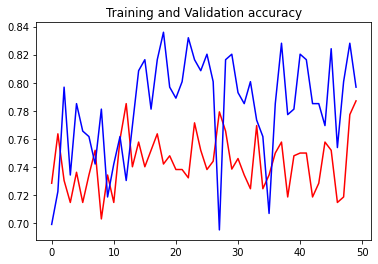

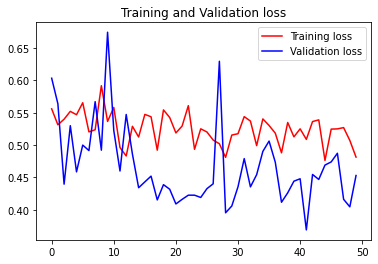

In [21]:
# Plotting loss vs accuracy

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

**Model in Production**
* Now, Let's look at actually running a prediction using our model. The code below will allow you to choose 1 or more files from your file system. It will then upload and run the model and give indication wheather the object is cat or a dog.

In [24]:
# Model in production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  if classes[0] > 0.5:
    print(fn, "is a Dog")
  else:
    print(fn, "is a Cat")

Saving download.jpg to download (1).jpg
[1.]
download.jpg is a Dog
